In [1]:
import pandas as pd
from pandas import Series,DataFrame

titanic_df = pd.read_csv(r'C:\Users\chi_b\OneDrive\Desktop\Linked Class\Data Projects\Kaggle-Titanic\train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Questions
**1. Who are the passengers?**

**2. Deck vs Class?**

**3. Which city did the passengers come from?**

**4. With family?**

**5. What factors help determining their survival**

## 1. Who are the passengers?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

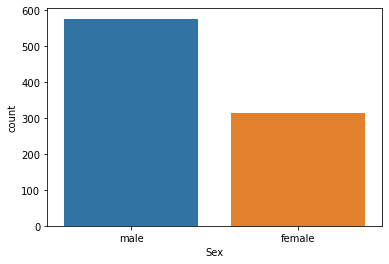

In [5]:
sns.countplot('Sex',data=titanic_df)

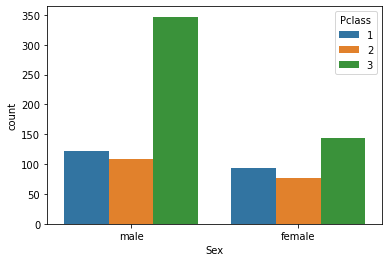

In [6]:
sns.countplot('Sex',data=titanic_df,hue='Pclass')

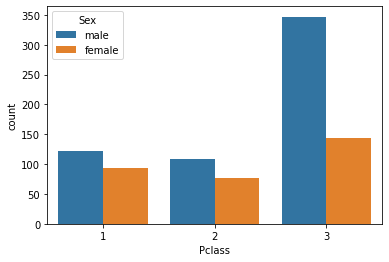

In [7]:
sns.countplot('Pclass',data=titanic_df,hue='Sex')

A lot of males in the 3rd class!!!!

In [8]:
#Is this passenger a male, female or child(regardless of sex)

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [9]:
#Apply the function to columns age and sex to create the person column
titanic_df['Person']=titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [10]:
titanic_df[0:11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


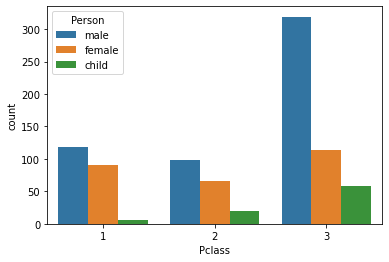

In [11]:
sns.countplot('Pclass',data=titanic_df,hue='Person')

A lot of children in third class???

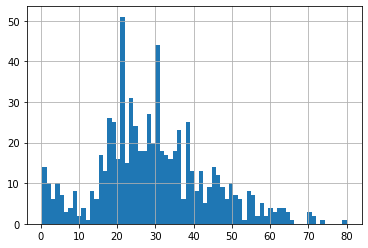

In [12]:
titanic_df['Age'].hist(bins=70)

In [13]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

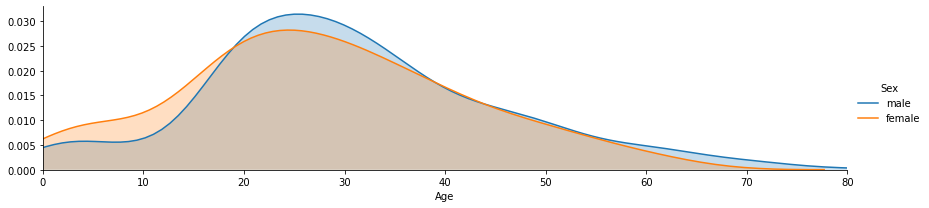

In [58]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

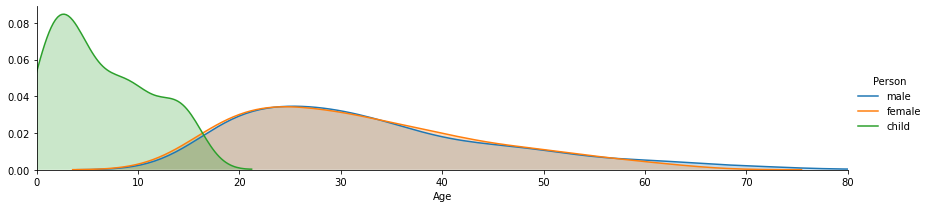

In [59]:
fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

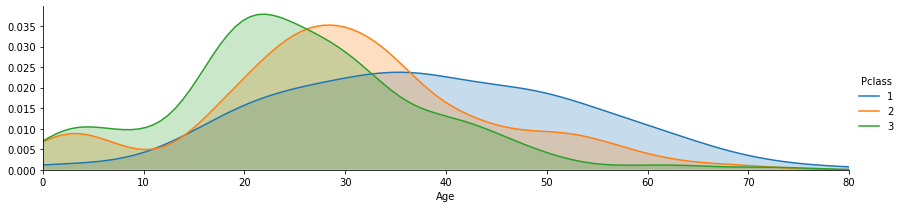

In [60]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

## 2. How does a passenger's class relate to their deck?

In [61]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [63]:
#drop null from Cabin

deck = titanic_df['Cabin'].dropna()

deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [66]:
#Grab the letter for deck

levels = deck.apply(lambda x: x[:1])
levels

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 204, dtype: object

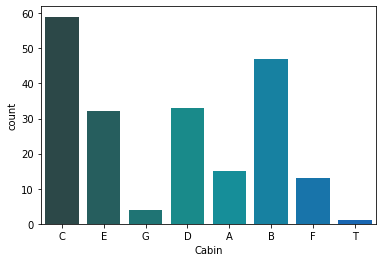

In [70]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

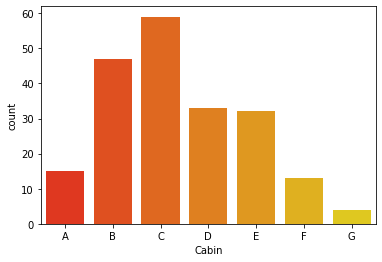

In [76]:
#Let's get rid of that nonsense T

cabin_df = cabin_df[cabin_df.Cabin !='T'].sort_values('Cabin')
sns.countplot('Cabin',data=cabin_df,palette='autumn')

Let's see how the Cabin relate to ticket's fare

In [96]:
titanic_df['Cabin']=levels

Cabin_Fare = titanic_df[['Cabin','Fare']].loc[titanic_df['Cabin']!='T'].dropna().sort_values('Cabin')
Cabin_Fare

,Cabin,Fare
96,A,34.6542
174,A,30.6958
209,A,31.0000
445,A,81.8583
647,A,35.5000
...,...,...
516,F,10.5000
251,G,10.4625
394,G,16.7000
10,G,16.7000


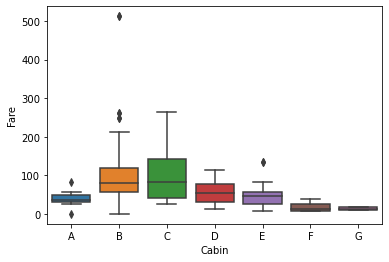

In [99]:
sns.boxplot(x='Cabin',y='Fare',data=Cabin_Fare)

We can see some outliers for cabin B but it looks like cabins B and C are the most expensive ones

# 3. Where did the passengers come from?

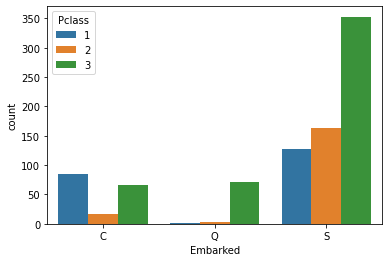

In [83]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

Queenstown passengers seemed to be from 3rd class  
Cherbourg had only a few 2nd class  
Most passengers were from Southampton  

In [102]:
# fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
# fig.map(sns.kdeplot,'Age',shade=True)

# oldest = titanic_df['Age'].max()
# fig.set(xlim=(0,oldest))

# fig.add_legend()

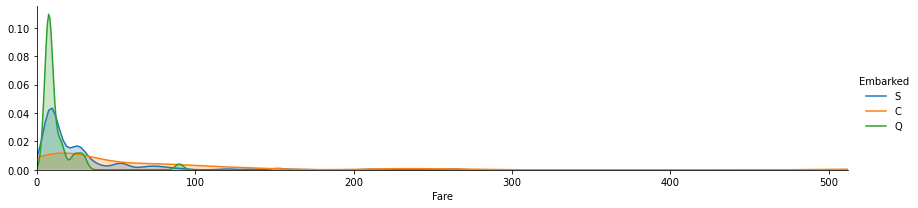

In [108]:
figure = sns.FacetGrid(titanic_df,hue='Embarked',aspect=4)

figure.map(sns.kdeplot,'Fare',shade=True)

most_expensive = titanic_df['Fare'].max()
figure.set(xlim=(0,most_expensive))
figure.add_legend()

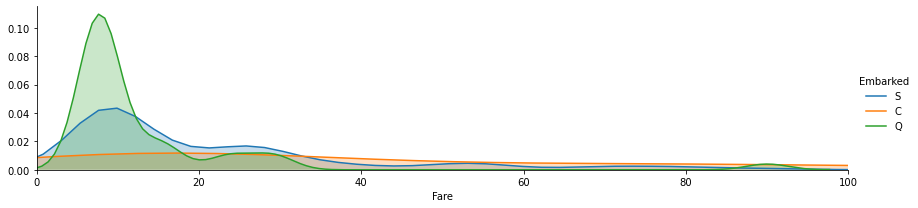

In [110]:
figure = sns.FacetGrid(titanic_df,hue='Embarked',aspect=4)

figure.map(sns.kdeplot,'Fare',shade=True)

figure.set(xlim=(0,100))
figure.add_legend()

People from Queenstown who are mostly in 3rd class pays cheaper fare. Seems like 3rd class is the lower class  
People from Cherboug have the most expensive fare but also cheaper fare.

# 3. Passengers with family?

In [116]:
titanic_df['Alone']=titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone'][0:11]

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     4
8     2
9     1
10    2
Name: Alone, dtype: int64

In [121]:
titanic_df['Alone'] = titanic_df['Alone'].apply(lambda x: 'With Family' if x>0 else('Alone'))

In [114]:
#Same thing baby
# titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
# titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\chi_b\Anaconda2\envs\ipykernel_py3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [122]:
titanic_df['Alone'].head()

0    With Family
1    With Family
2          Alone
3    With Family
4          Alone
Name: Alone, dtype: object

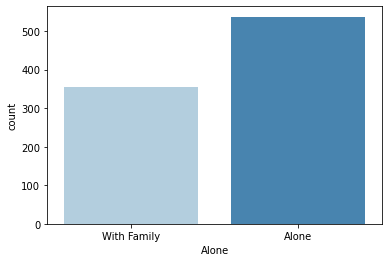

In [123]:
sns.countplot('Alone',data=titanic_df,palette='Blues')

# 5. What factors affected a passenger's survival?

In [124]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

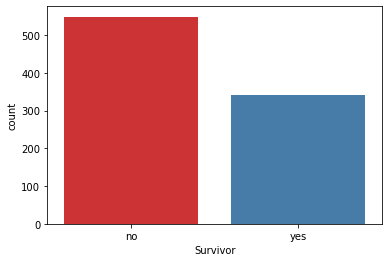

In [129]:
sns.countplot('Survivor',data=titanic_df,palette='Set1')

# Is class a factor? 

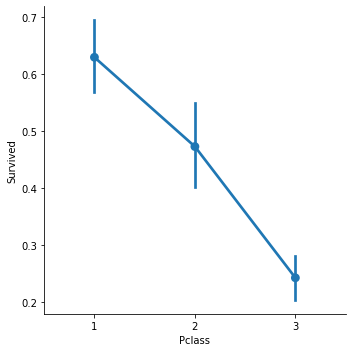

In [134]:
sns.catplot('Pclass','Survived',data=titanic_df,kind='point')

Looks like 3rd class' survival rate is lowwwwwwwwwwww

But 3rd class also has a lot more males! Maybe it is because "Women and Children First"?

# Is sex a factor?

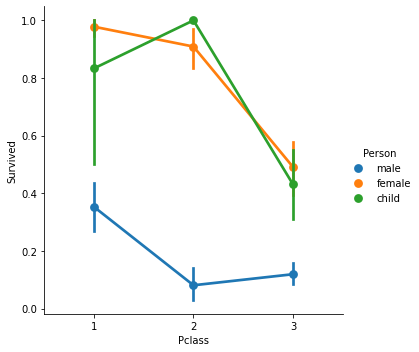

In [135]:
sns.catplot('Pclass','Survived',hue='Person',data=titanic_df,kind='point')

# Is age a factor?

Being a male seems having a low rate of survival regardless of classes

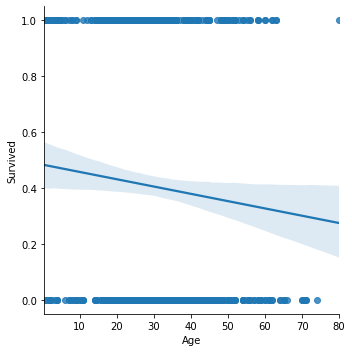

In [136]:
sns.lmplot('Age','Survived',data=titanic_df)

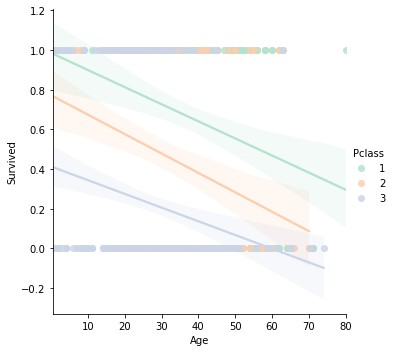

In [143]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='Pastel2')

It looks like regardless of class, the older the passenger, the less likely they were to survive

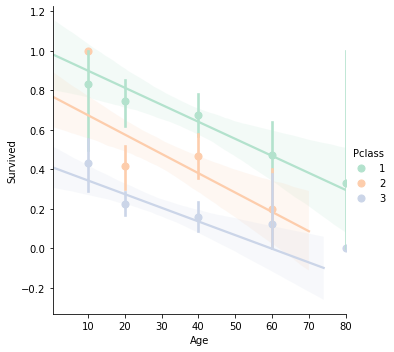

In [144]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='Pastel2',x_bins=generations)

Really high standard deviation of old passenger in 1st class

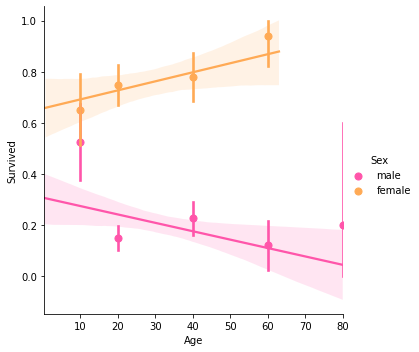

In [146]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='spring',x_bins=generations)

Hmmmmmm, the older you are as a female, the more likely you are to survive but it's the opposite for male!!

# Is cabin a factor?

In [147]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Level,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,female,C,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,female,C,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN,Alone,no


In [178]:
cabin_df=titanic_df.loc[:,['Cabin','Survived']].dropna()
cabin_df=cabin_df.loc[cabin_df['Cabin']!='T'].sort_values('Cabin')
cabin_df

,Cabin,Survived
96,A,0
174,A,0
209,A,1
445,A,1
647,A,1
...,...,...
516,F,1
251,G,0
394,G,1
10,G,1


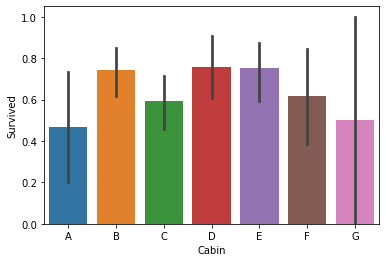

In [179]:
sns.barplot('Cabin',y='Survived',data=cabin_df)

At first glance, cabin A and G seems to have lower survival rate but their standard deviations are huge so we may need to carry out a hypothesis testing

# Chi Square Test:
Null Hypothesis: There is no different in survival rates among cabins  
$\alpha = 0.05$

In [275]:
#Expected values
cA = cabin_df.loc[cabin_df.Cabin=='A'].count()
cB = cabin_df.loc[cabin_df.Cabin=='B'].count()
cC = cabin_df.loc[cabin_df.Cabin=='C'].count()
cD = cabin_df.loc[cabin_df.Cabin=='D'].count()
cE = cabin_df.loc[cabin_df.Cabin=='E'].count()
cF = cabin_df.loc[cabin_df.Cabin=='F'].count()
cG = cabin_df.loc[cabin_df.Cabin=='G'].count()

total = cabin_df.Cabin.count()

total_sur = cabin_df.loc[cabin_df.Survived==1,'Survived'].count()
exp_sur_perc = total_sur/total
cabin_total = [cA,cB,cC,cD,cE,cF,cG]

Cabin_Exp=[]
for x in cabin_total:
    Cabin_Exp.append(x.Cabin*exp_sur_perc)
Cabin_Exp

[10.049261083743842,
 31.48768472906404,
 39.52709359605911,
 22.108374384236452,
 21.438423645320196,
 8.70935960591133,
 2.6798029556650245]

In [268]:
#Observed values

ocA = cabin_df.loc[cabin_df.Cabin=='A']
ocB = cabin_df.loc[cabin_df.Cabin=='B']
ocC = cabin_df.loc[cabin_df.Cabin=='C']
ocD = cabin_df.loc[cabin_df.Cabin=='D']
ocE = cabin_df.loc[cabin_df.Cabin=='E']
ocF = cabin_df.loc[cabin_df.Cabin=='F']
ocG = cabin_df.loc[cabin_df.Cabin=='G']
oCabin = [ocA,ocB,ocC,ocD,ocE,ocF,ocG]
ocA.Survived.sum()

7

In [270]:
Cabin_Obs=[]
for y in oCabin:
    Cabin_Obs.append(y.Survived.sum())
Cabin_Obs

[7, 35, 35, 25, 24, 8, 2]

In [279]:
from scipy import stats
stats.chisquare(Cabin_Obs, Cabin_Exp)

Power_divergenceResult(statistic=2.7500211301323914, pvalue=0.8395039452572353)

Since the $p-value = 0.8 > 0.05 = \alpha $, we failed to reject the null hypothesis  
There is no statistically significant evidence that there is a different in survival rates among cabins